# Liver Disease Prediction

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import os
from xgboost import XGBClassifier
from xgboost import plot_importance
import joblib

In [202]:
df=pd.read_csv('liver.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Exploratory Data Analysis

In [203]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

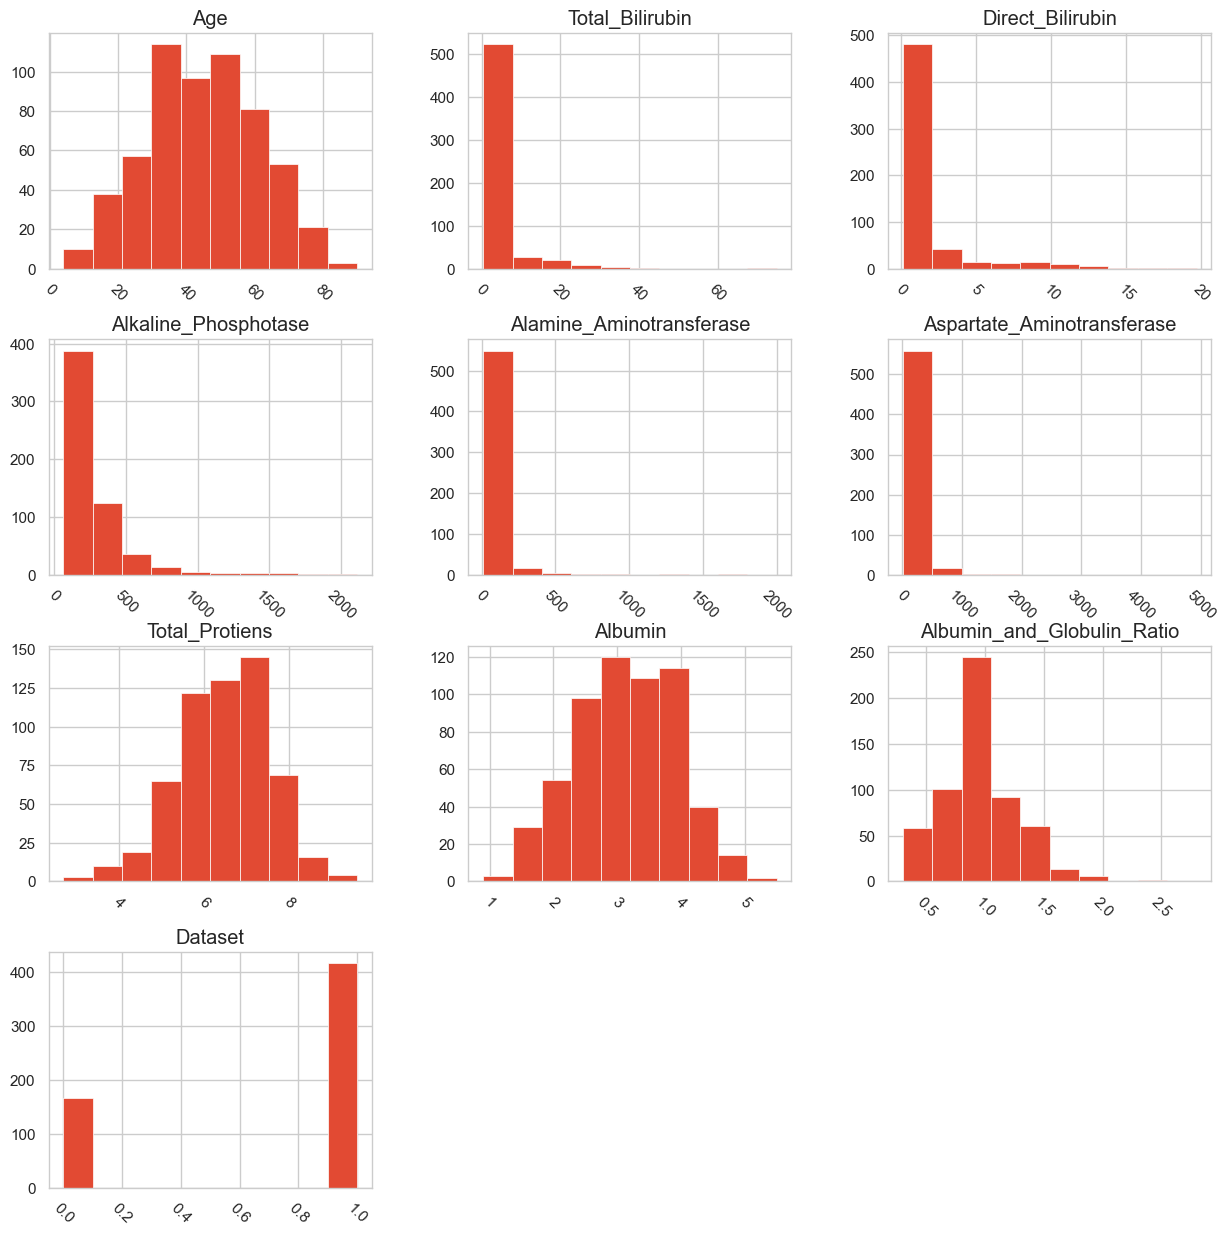

In [204]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [205]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [206]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [207]:
df.dropna(inplace=True)

In [208]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [209]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,0.133164
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,0.220218
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,0.246273
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,0.183363
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,0.163117
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,0.151834
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,-0.033614
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,-0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Dataset,0.133164,0.220218,0.246273,0.183363,0.163117,0.151834,-0.033614,-0.159770,-0.163131,1.000000


<Axes: >

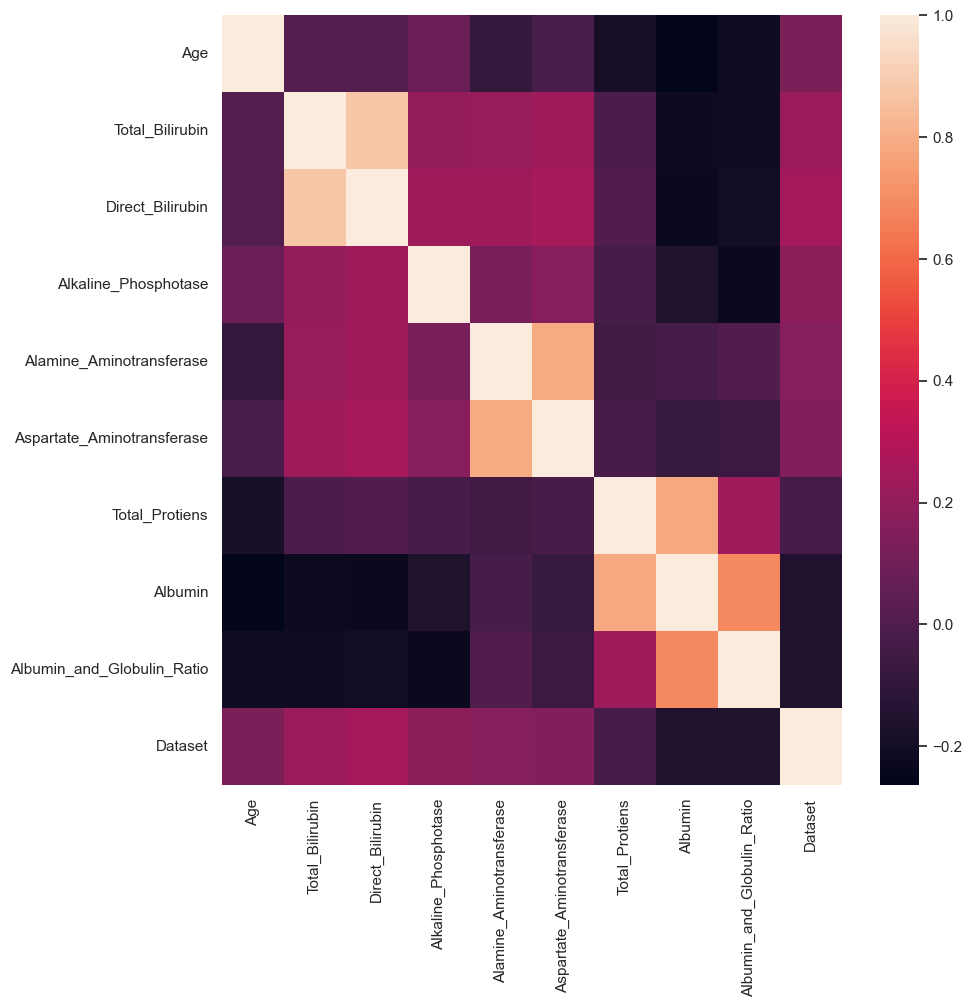

In [210]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [211]:
df.drop_duplicates(inplace = True)

In [212]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [213]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Machine Learning Models

### Data Preparation

In [214]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [215]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [216]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(396, 10) (170, 10) (396,) (170,)


In [217]:
# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LR

In [218]:
# fitting data to model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [219]:
# model predictions

y_pred = lr.predict(X_test)

In [220]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7121212121212122
0.7588235294117647


In [221]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 17  32]
 [  9 112]]


In [222]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.35      0.45        49
           1       0.78      0.93      0.85       121

    accuracy                           0.76       170
   macro avg       0.72      0.64      0.65       170
weighted avg       0.74      0.76      0.73       170



# KNN

In [223]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [224]:
# model predictions 

y_pred = knn.predict(X_test)

In [225]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.797979797979798
0.6529411764705882


In [226]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[18 31]
 [28 93]]


In [227]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.37      0.38        49
           1       0.75      0.77      0.76       121

    accuracy                           0.65       170
   macro avg       0.57      0.57      0.57       170
weighted avg       0.65      0.65      0.65       170



# SVM

In [228]:
svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [229]:
# best parameters

grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [230]:
# best score 

grid_search.best_score_

0.7146518987341773

In [231]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [232]:
# model predictions 

y_pred = svc.predict(X_test)

In [233]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.7146464646464646
0.711764705882353


In [234]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[  0  49]
 [  0 121]]


In [235]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



# DT

In [236]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6235294117647059 

Confusion Matrix :- 
[[15 34]
 [30 91]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.33      0.31      0.32        49
           1       0.73      0.75      0.74       121

    accuracy                           0.62       170
   macro avg       0.53      0.53      0.53       170
weighted avg       0.61      0.62      0.62       170



In [237]:
# hyper parameter tuning of decision tree 
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [238]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'random'}
0.7302389705882354


In [239]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7146464646464646
Test Accuracy of Decision Tree Classifier is 0.711764705882353 

Confusion Matrix :- 
[[  0  49]
 [  0 121]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



# RF

In [240]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='auto',
                       min_samples_leaf=4, n_estimators=130)

In [241]:
y_pred = rand_clf.predict(X_test)

In [242]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9343434343434344
0.6941176470588235


In [243]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 17  32]
 [ 20 101]]


In [244]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40        49
           1       0.76      0.83      0.80       121

    accuracy                           0.69       170
   macro avg       0.61      0.59      0.60       170
weighted avg       0.67      0.69      0.68       170



# Gradient Boosting Classifier

In [245]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [246]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 0.001, 'loss': 'deviance', 'n_estimators': 100}

In [247]:
# best score

grid_search_gbc.best_score_

0.7148684210526315

In [248]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [249]:
y_pred = gbc.predict(X_test)

In [250]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9393939393939394
0.7058823529411765


In [251]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 17  32]
 [ 18 103]]


In [252]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.35      0.40        49
           1       0.76      0.85      0.80       121

    accuracy                           0.71       170
   macro avg       0.62      0.60      0.60       170
weighted avg       0.68      0.71      0.69       170



# XGBoost

In [253]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 300)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [254]:
y_pred = xgb.predict(X_test)

In [255]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9924242424242424
0.6882352941176471


In [256]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 15  34]
 [ 19 102]]


In [257]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.31      0.36        49
           1       0.75      0.84      0.79       121

    accuracy                           0.69       170
   macro avg       0.60      0.57      0.58       170
weighted avg       0.66      0.69      0.67       170



# Model Comparison

In [258]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,75.88
2,SVM,71.18
3,Decision Tree Classifier,71.18
5,Gradient Boosting Classifier,70.59
4,Random Forest Classifier,69.41
6,XgBoost,68.82
1,KNN,65.29


In [259]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl",'wb'))